In [17]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [2]:
t,g=smp.symbols('t g')

Mass of the cart M
m1 m2 are the mass of pendulum 1 & 2
L1 & L2 are the length of pendulum 1 & 2

In [3]:
m1,m2=smp.symbols('m1 m2')
L1,L2=smp.symbols('L1 L2')

Theta 1 & Theta 2 are the angles that the pendulum create with the parallel surface of the cart

In [4]:
theta1,theta2=smp.symbols(r'\theta1 \theta2',cls=smp.Function)
theta1=theta1(t)
theta2=theta2(t)

theta1

\theta1(t)

In [5]:
theta1_d=smp.diff(theta1,t)
theta2_d = smp.diff(theta2, t)
theta1_dd = smp.diff(theta1_d, t)
theta2_dd = smp.diff(theta2_d, t)

In [6]:
x1 = L1*smp.sin(theta1)
y1 = L1*smp.cos(theta1)
x2 = L2*smp.sin(theta2)
y2 = L2*smp.cos(theta2)

Kinetic Energy

In [7]:
K=0.5*(m1*((theta1_d*y1)**2+(theta1_d*x1)**2)+m2*((y1*theta1_d+y2*theta2_d)**2+(x1*theta1_d+x2*theta2_d)**2))
K

0.5*m1*(L1**2*sin(\theta1(t))**2*Derivative(\theta1(t), t)**2 + L1**2*cos(\theta1(t))**2*Derivative(\theta1(t), t)**2) + 0.5*m2*((L1*sin(\theta1(t))*Derivative(\theta1(t), t) + L2*sin(\theta2(t))*Derivative(\theta2(t), t))**2 + (L1*cos(\theta1(t))*Derivative(\theta1(t), t) + L2*cos(\theta2(t))*Derivative(\theta2(t), t))**2)

In [8]:
P=g*(m1*y1+m2*(y1+y2))
P

g*(L1*m1*cos(\theta1(t)) + m2*(L1*cos(\theta1(t)) + L2*cos(\theta2(t))))

In [9]:
L=K-P
L

-g*(L1*m1*cos(\theta1(t)) + m2*(L1*cos(\theta1(t)) + L2*cos(\theta2(t)))) + 0.5*m1*(L1**2*sin(\theta1(t))**2*Derivative(\theta1(t), t)**2 + L1**2*cos(\theta1(t))**2*Derivative(\theta1(t), t)**2) + 0.5*m2*((L1*sin(\theta1(t))*Derivative(\theta1(t), t) + L2*sin(\theta2(t))*Derivative(\theta2(t), t))**2 + (L1*cos(\theta1(t))*Derivative(\theta1(t), t) + L2*cos(\theta2(t))*Derivative(\theta2(t), t))**2)

In [10]:
LE1 = smp.diff(L,theta1) - smp.diff(smp.diff(L,theta1_d), t).simplify()
LE2 = smp.diff(L,theta2) - smp.diff(smp.diff(L,theta2_d), t).simplify()

In [11]:
sols = smp.solve([LE1, LE2], (theta1_dd, theta2_dd),
                simplify=False, rational=False)

In [12]:
dz1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,theta1,theta2,theta1_d,theta2_d), sols[theta1_dd])
dz2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,theta1,theta2,theta1_d,theta2_d), sols[theta2_dd])
dthe1dt_f = smp.lambdify(theta1_d, theta1_d)
dthe2dt_f = smp.lambdify(theta2_d, theta2_d)

In [13]:
def dSdt(S, t, g, m1, m2, L1, L2):
    theta1, z1, theta2, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t, g, m1, m2, L1, L2, theta1, theta2, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(t, g, m1, m2, L1, L2, theta1, theta2, z1, z2),
    ]

In [16]:
t = np.linspace(0, 40, 1001)
g = 9.8
m1=2
m2=5
L1 = 2
L2 = 1
ans = odeint(dSdt, y0=[1, -3, -1, 5], t=t, args=(g,m1,m2,L1,L2))

In [15]:
ans.T

array([[   1.        ,    0.87609694,    0.74072756, ..., -139.2606501 ,
        -139.37547138, -139.48844684],
       [  -3.        ,   -3.21501364,   -3.58769986, ...,   -2.91385624,
          -2.83817367,   -2.8180837 ],
       [  -1.        ,   -0.78880255,   -0.54712807, ...,  239.91784606,
         240.10070869,  240.27216463],
       [   5.        ,    5.60191305,    6.56395447, ...,    4.74702342,
           4.4136189 ,    4.1743952 ]])

In [81]:
heta1 = ans.T[0]
theta2 = ans.T[2]

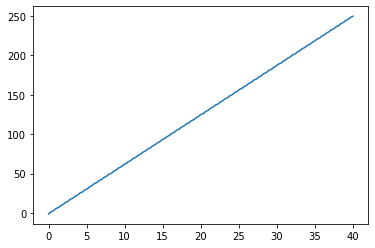

In [82]:
plt.plot(t, theta2)

In [83]:
def get_x1y1x2y2(t, theta1, theta2, L1, L2):
    return (L1*np.sin(theta1),
            -L1*np.cos(theta1),
            L1*np.sin(theta1) + L2*np.sin(theta2),
            -L1*np.cos(theta1) - L2*np.cos(theta2))

In [85]:
x1, y1, x2, y2 = get_x1y1x2y2(t, ans.T[0], ans.T[2], L1, L2)

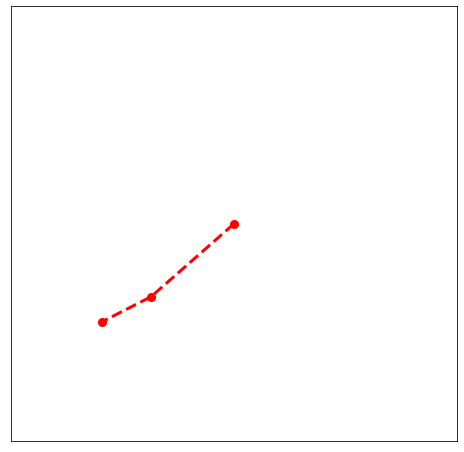

In [86]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('w')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig,animate, frames=100, interval=50)
ani.save('pen.gif',writer='pillow',fps=25)